# Model Building

### Import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
sns.set_style('darkgrid')

### Load data into dataframe

In [23]:
data = pd.read_csv('Mobile_data.csv',header=0)
data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


### Check Shape of the dataframe

In [24]:
data.shape

(2000, 15)

### Copy of the data

In [25]:
df = data.copy(deep =True)
df.shape

(2000, 15)

### Check for NULL values and value countes in the target variable

In [26]:
df['price_range'].isnull().sum()

0

In [27]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [28]:
X = df.drop('price_range',axis=1)
y = df.price_range
print(X.shape)
print(y.shape)

(2000, 14)
(2000,)


In [29]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y , test_size=0.2 ,random_state=42 ,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 14)
(1600,)
(400, 14)
(400,)


### prepare the training data 

1. Check with the outliers

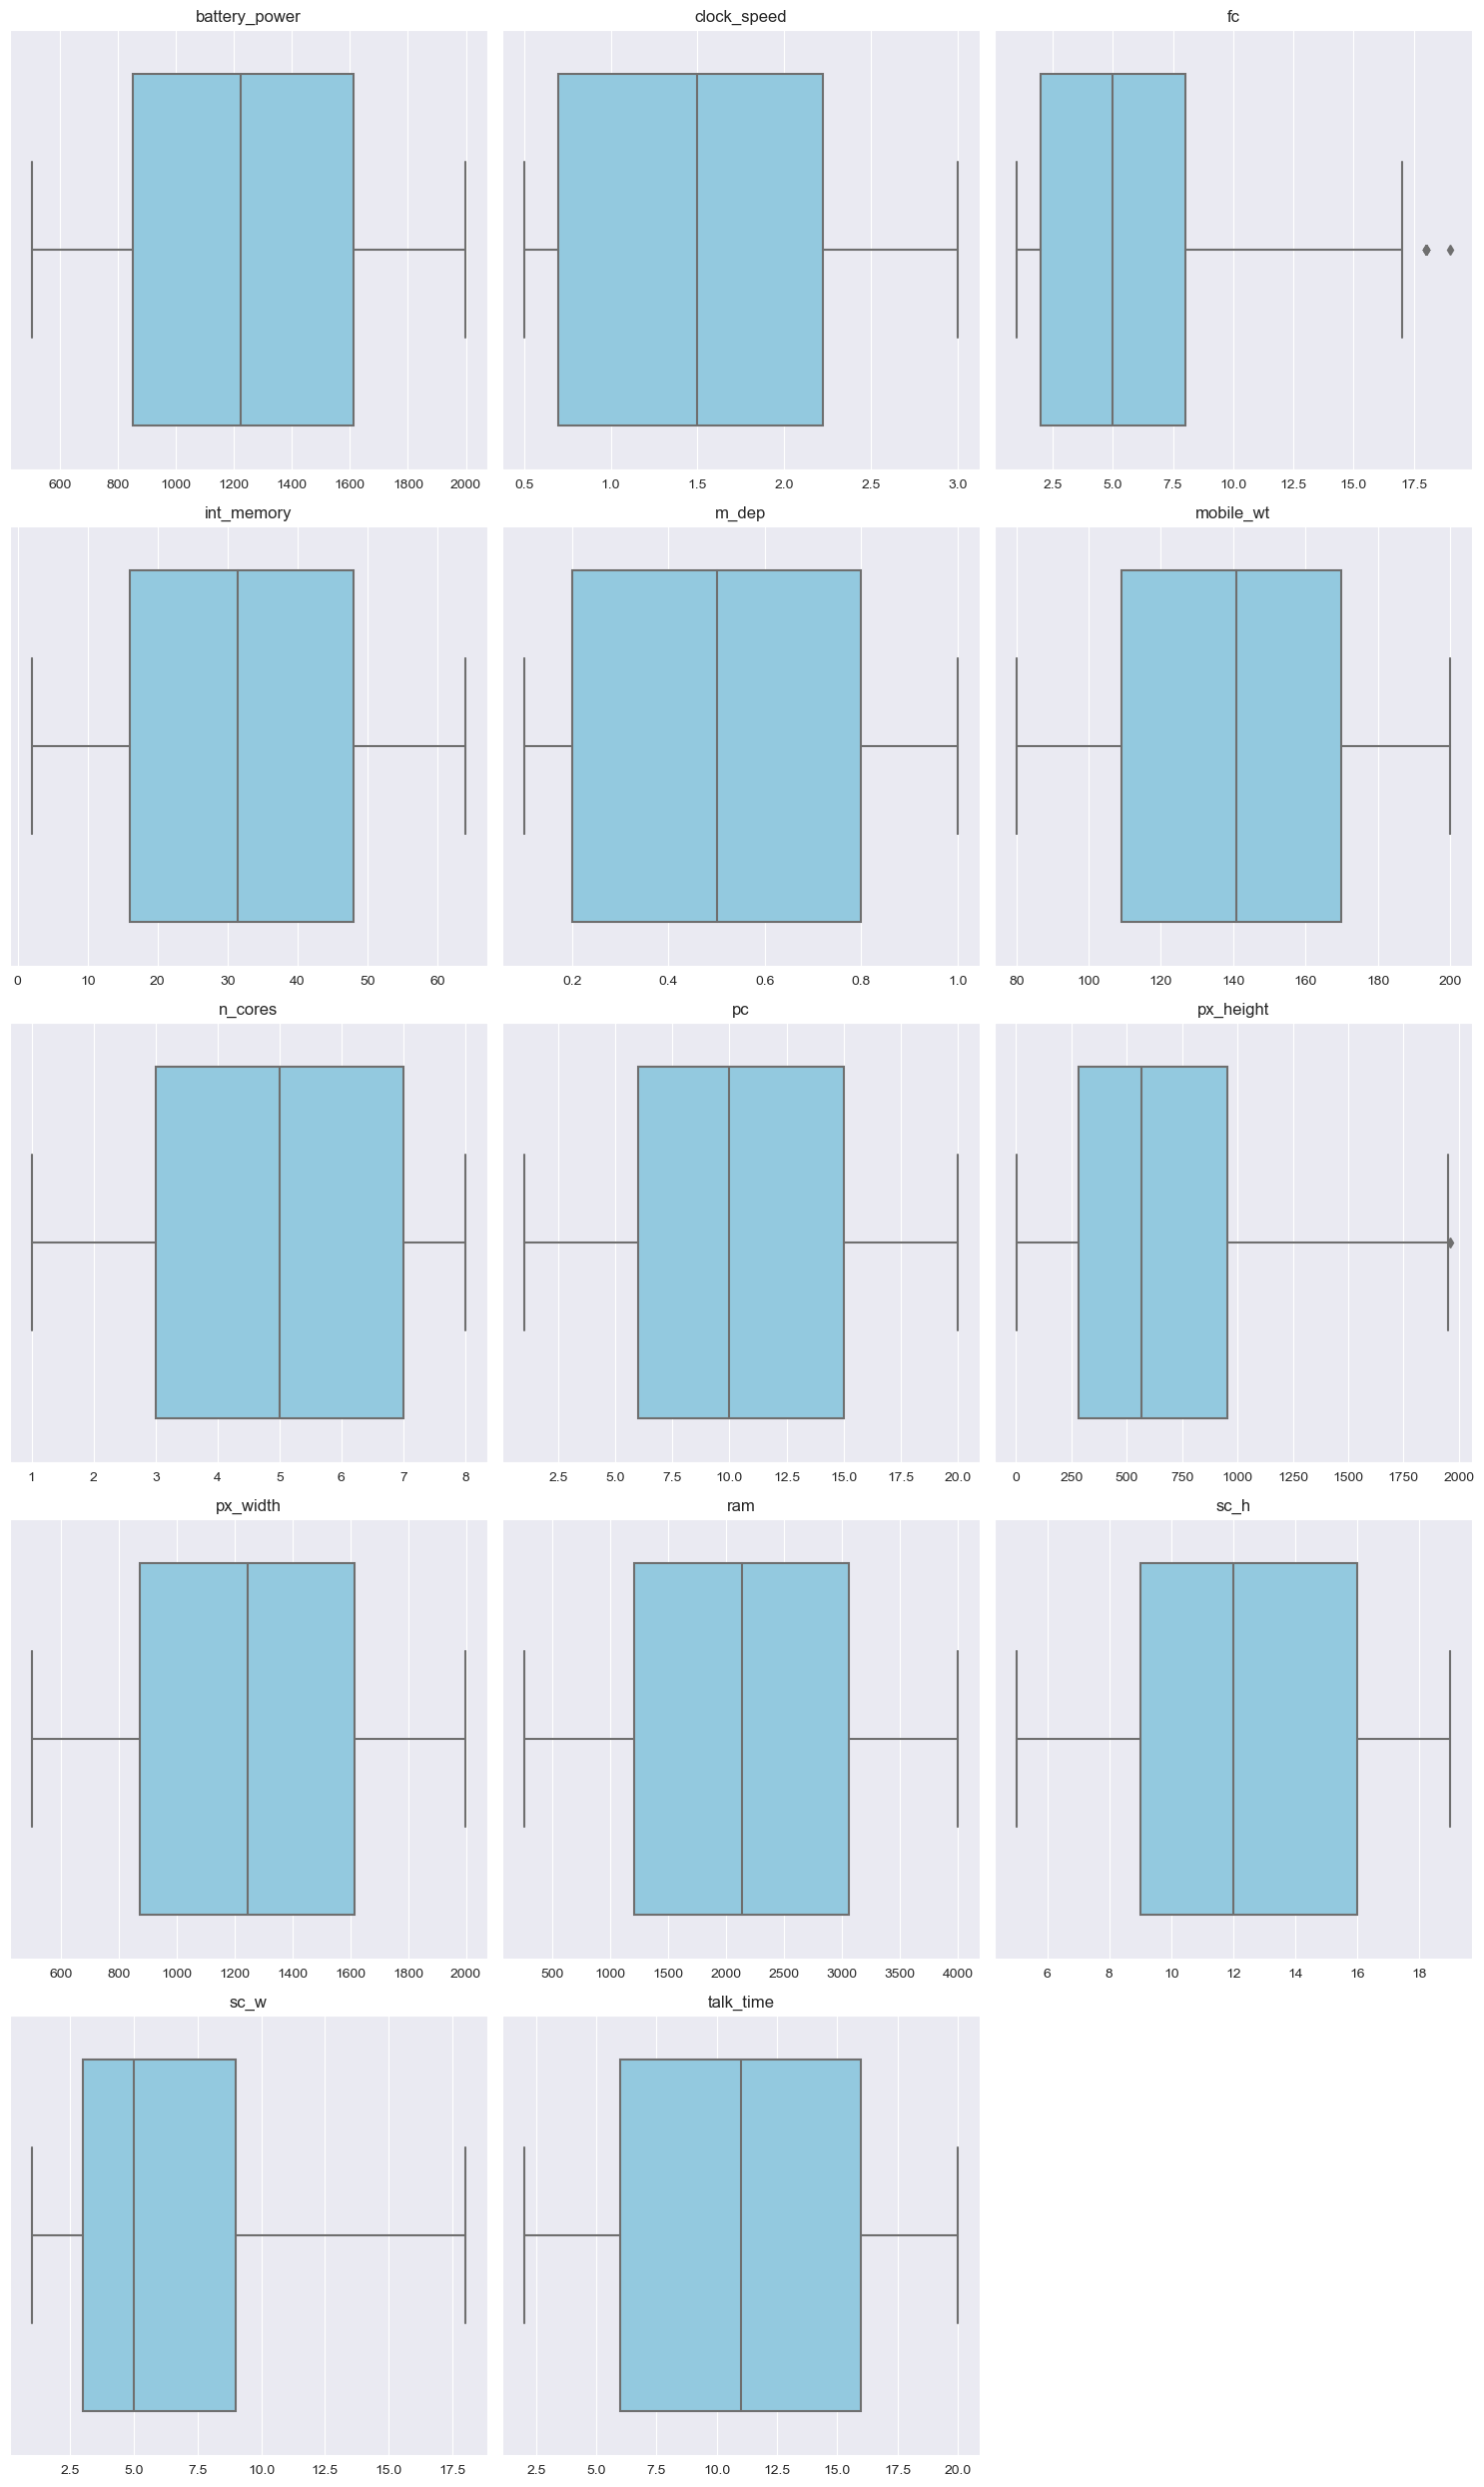

In [32]:
# Determine the number of columns in the DataFrame
num_columns = len(X_train.columns.values)

# Calculate the number of rows required for subplots
num_rows = (num_columns + 2) // 3  # Add 2 to handle uneven number of columns

# Set up the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(X_train.columns.values):
    sns.boxplot(ax=axes[i], data=X_train, x = column, color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove empty subplots if present
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


there are no logical outliers in the training dataset ..but there are outliers in columns 'fc' and 'px_height'

2. Deal with the null values

In [30]:
for i in ['fc' , 'pc' , 'px_height' , 'sc_w'] :
    X_train[i] = X_train[i].replace(0, np.nan)

In [31]:
temp=pd.DataFrame(X_train.isnull().sum()[X_train.isnull().sum()>0])
temp.reset_index(drop=False,inplace=True)
temp.columns =['features','null values']

temp['%null values'] = np.round(temp['null values']/len(X_train)*100,4)
temp

,features,null values,%null values
0,fc,372,23.2500
1,pc,82,5.1250
2,px_height,1,0.0625
3,sc_w,144,9.0000


In [33]:
for col in X_train.columns.values:
    X_train[col].fillna(value = X_train[col].median(),inplace =True)

X_train.isnull().sum().sum()

0

3. Deal with the outliers

In [34]:
# Specify the columns that need outlier treatment
columns_to_treat = X_train.columns

# Function to treat outliers using Tukey's method
def treat_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Treat outliers for the specified columns
for column in columns_to_treat:
    treat_outliers(X_train, column)

# Check the updated DataFrame
X_train.head()


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
469,1845,0.5,10.0,61,0.3,96,1,12.0,292.0,695,1731,9,5.0,6
565,1271,0.5,12.0,32,0.1,113,7,15.0,1350.0,1949,445,15,14.0,14
396,788,2.5,4.0,57,0.9,91,8,12.0,42.0,1161,3969,12,8.0,6
452,1406,0.5,2.0,34,0.8,98,3,5.0,1017.0,1366,3915,9,8.0,2
325,920,2.1,5.0,25,0.4,115,7,14.0,209.0,1078,785,10,7.0,5


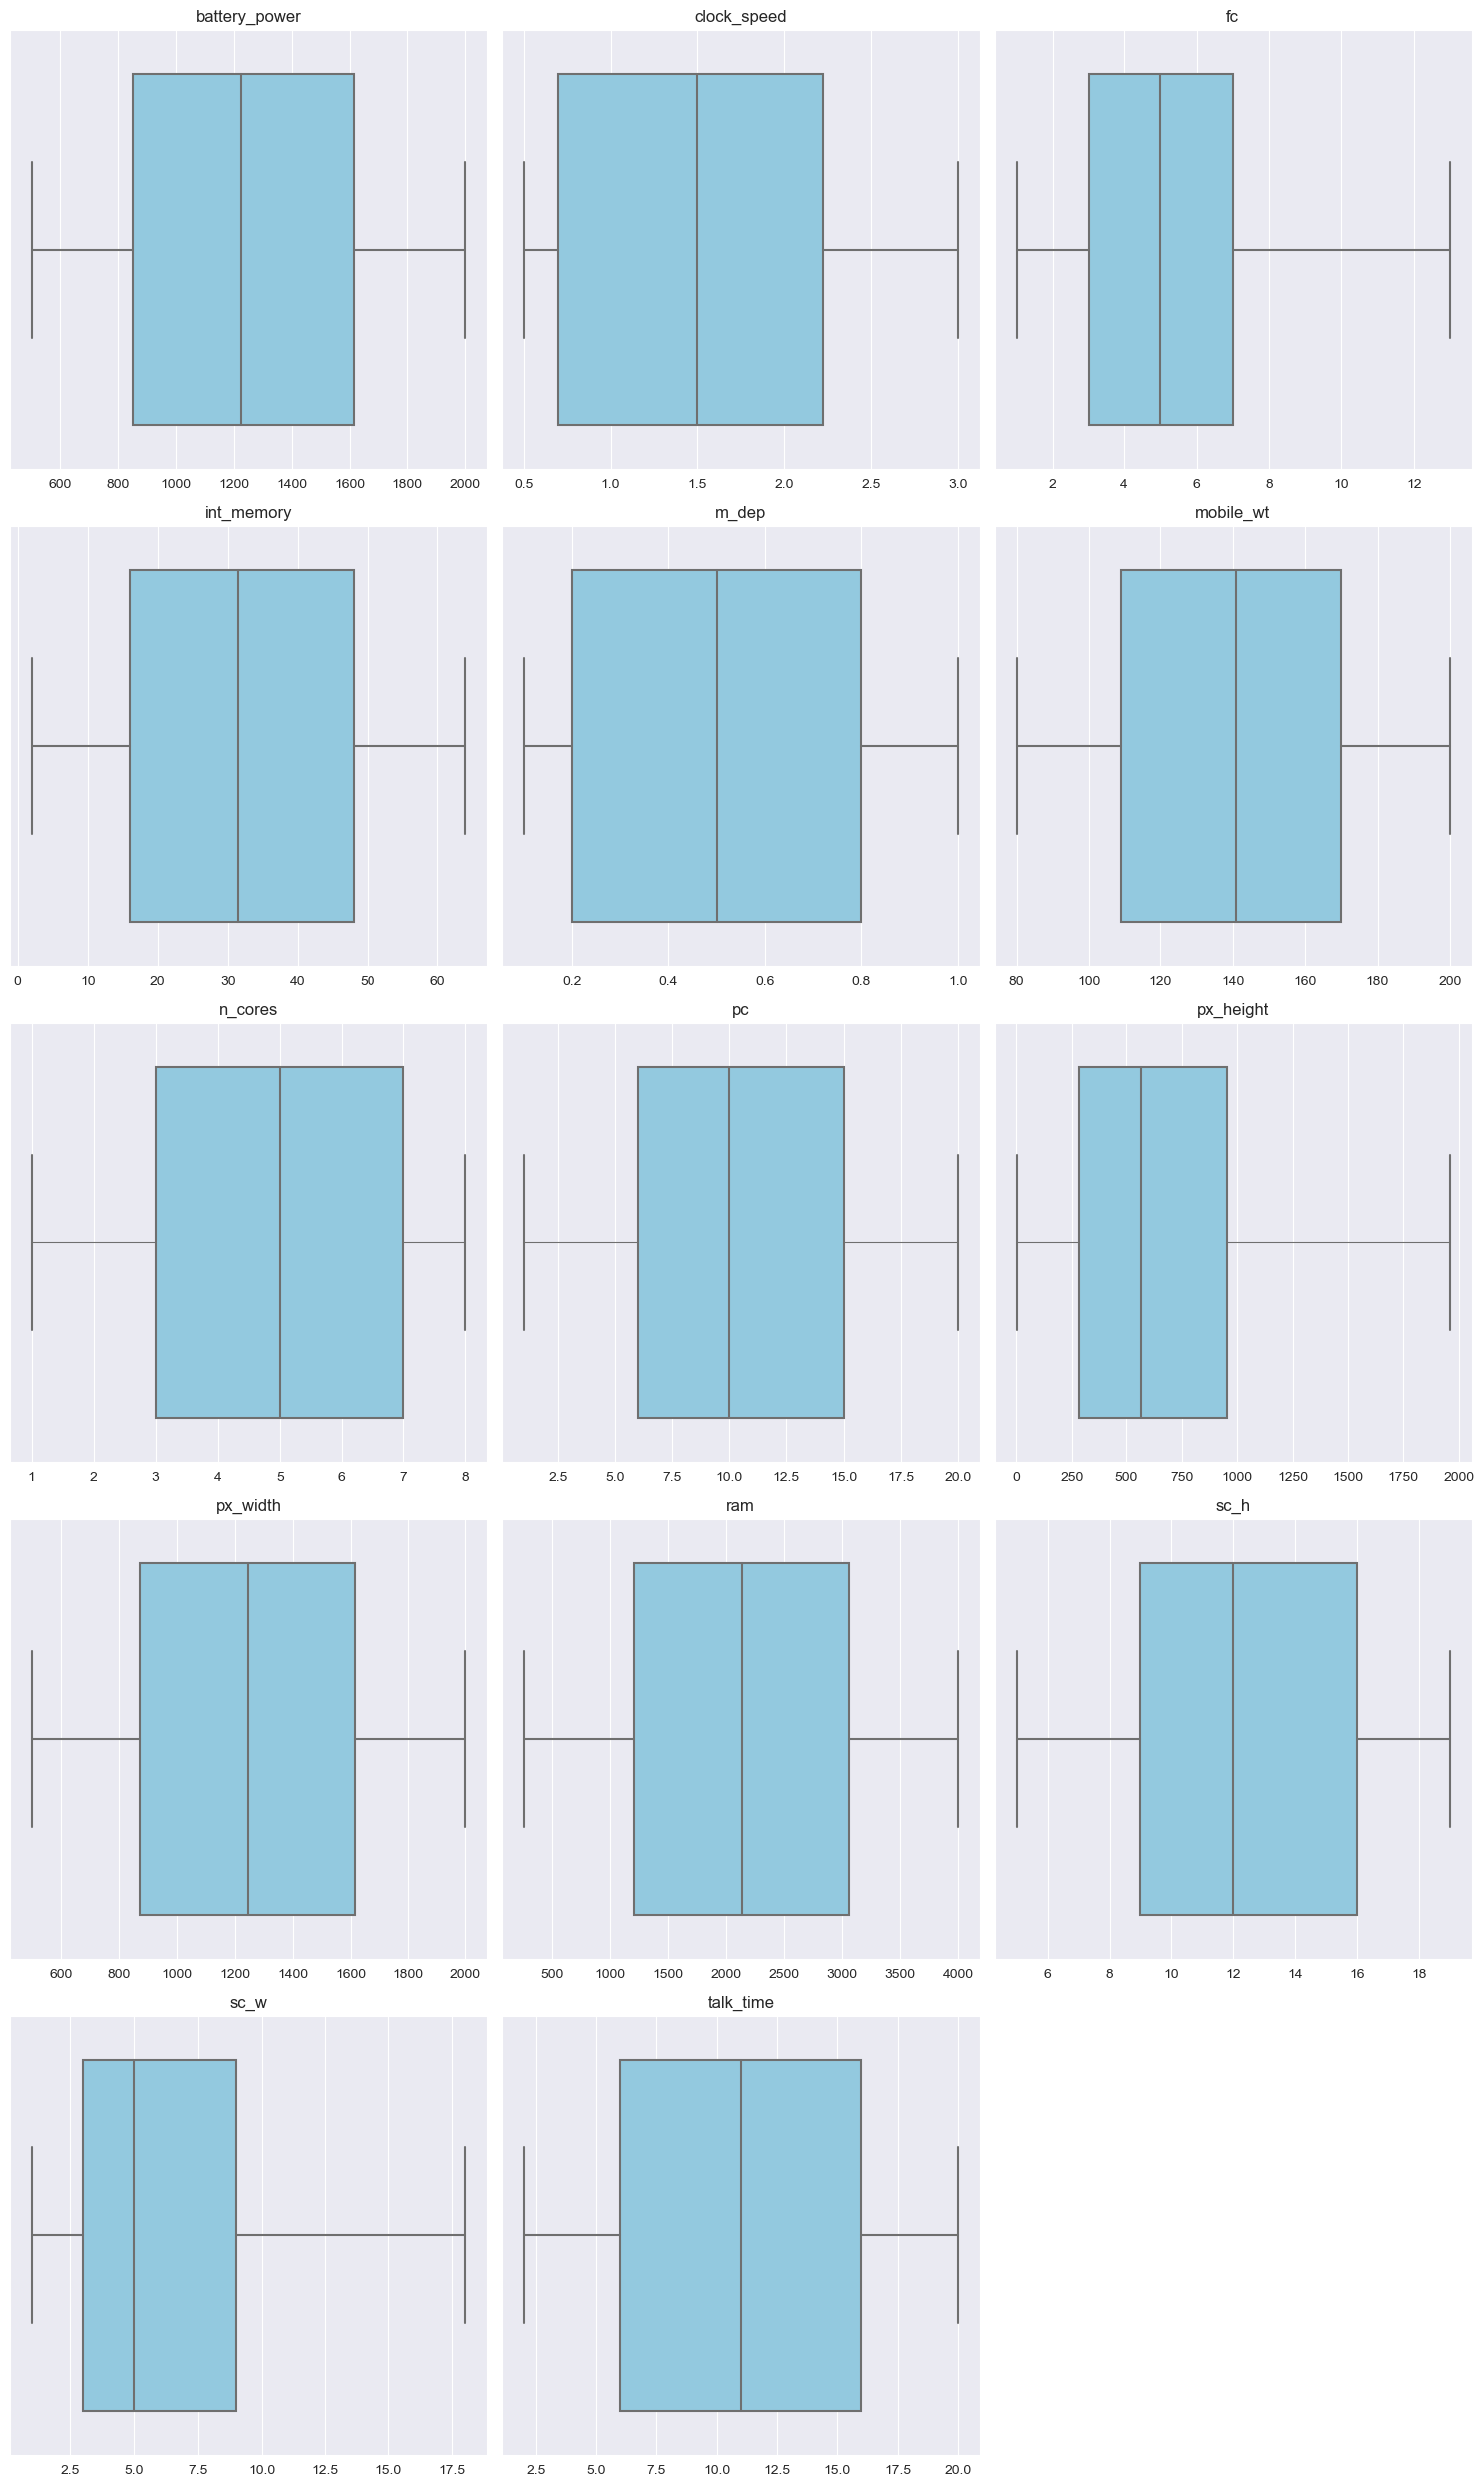

In [35]:
# Determine the number of columns in the DataFrame
num_columns = len(X_train.columns.values)

# Calculate the number of rows required for subplots
num_rows = (num_columns + 2) // 3  # Add 2 to handle uneven number of columns

# Set up the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(X_train.columns.values):
    sns.boxplot(ax=axes[i], data=X_train, x = column, color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove empty subplots if present
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


4. Scale the data

In [37]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)

X_train_scaled

array([[ 1.38919326, -1.25918898,  1.39185673, ..., -0.78128983,
        -0.30653991, -0.89664506],
       [ 0.07840603, -1.25918898,  1.99292846, ...,  0.64708236,
         1.93871684,  0.56094407],
       [-1.02457347,  1.18747125, -0.41135847, ..., -0.06710374,
         0.441879  , -0.89664506],
       ...,
       [ 1.10374308,  0.5758062 ,  2.29346433, ...,  0.40902033,
        -1.05495883, -1.0788437 ],
       [-1.21867959,  1.43213728,  1.99292846, ...,  0.40902033,
         0.19240603, -0.71444642],
       [-0.39429947,  1.6768033 , -1.31296606, ...,  0.88514439,
         1.68924387, -0.89664506]])

5. Prepare the test dataset

1. check for null values

In [40]:
X_test.isnull().sum().sum()

0

2. scale the test data 

In [41]:
X_test_scaled = scalar.transform(X_test)
X_test_scaled

array([[ 1.22477395,  1.18747125,  3.19507192, ...,  1.12320642,
        -0.05706694,  0.37874543],
       [ 1.70204665,  0.08647415, -1.0124302 , ...,  0.1709583 ,
        -0.80548586,  0.56094407],
       [-1.57263781, -0.64752392, -1.61350193, ...,  1.12320642,
         1.93871684, -0.53224778],
       ...,
       [ 0.55111153, -0.89218995,  1.99292846, ..., -1.73353795,
        -1.05495883, -0.89664506],
       [ 1.55589616,  0.45347318, -1.0124302 , ..., -1.25741389,
        -1.30443181,  0.92534135],
       [-1.2346648 , -1.25918898,  0.18971327, ...,  1.36126845,
         0.441879  , -0.35004914]])

6. Choose the base model

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = [
    ('Logistic Regression', LogisticRegression(penalty='l2')),
    ('KNN', KNeighborsClassifier(n_neighbors=40)),
    ('Tree' ,DecisionTreeClassifier(random_state=42 , min_samples_split=10)),
    ('SVM', SVC(gamma=0.01 , C = 1 , kernel='rbf'))
]

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(name)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()

Logistic Regression
Confusion Matrix:
[[98  2  0  0]
 [ 0 96  4  0]
 [ 0  2 94  4]
 [ 0  0  2 98]]
Accuracy Score: 0.965
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.96      0.96      0.96       100
           2       0.94      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.97       400
weighted avg       0.97      0.96      0.97       400


KNN
Confusion Matrix:
[[77 21  2  0]
 [22 51 25  2]
 [ 1 25 59 15]
 [ 0  1 27 72]]
Accuracy Score: 0.6475
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       100
           1       0.52      0.51      0.52       100
           2       0.52      0.59      0.55       100
           3       0.81      0.72      0.76       100

    accuracy       

from above evalution we chooose LogisticRegression and SVC as our base models.

7. Try Bagging and boosting algorithms

In [48]:
! pip install xgboost 

     ---------------------------------------- 70.9/70.9 MB 3.0 MB/s eta 0:00:00


In [50]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = [
    ('RF', RandomForestClassifier(random_state=42)),
    ('ET', ExtraTreesClassifier(random_state=42)),
    ('Adaboost' , AdaBoostClassifier(random_state=42)),
    ('Gradient', GradientBoostingClassifier(random_state=42)),
    ('Xgboost' , XGBClassifier()) 
]

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(name)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()

RF
Confusion Matrix:
[[97  3  0  0]
 [ 4 87  9  0]
 [ 0 13 83  4]
 [ 0  0  5 95]]
Accuracy Score: 0.905
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.84      0.87      0.86       100
           2       0.86      0.83      0.84       100
           3       0.96      0.95      0.95       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.90       400
weighted avg       0.91      0.91      0.90       400


ET
Confusion Matrix:
[[96  4  0  0]
 [ 7 85  8  0]
 [ 0 16 72 12]
 [ 0  0  3 97]]
Accuracy Score: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       100
           1       0.81      0.85      0.83       100
           2       0.87      0.72      0.79       100
           3       0.89      0.97      0.93       100

    accuracy                          

we choose XGboost for furhter tunning

from all the evaluation metrics we chose Logistic regression ,SVC and XGboost for Tunninng

8. Tune the model and evaluate them

In [54]:
logistic_param_grid = [    
    {
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
    }
]

svc_param_grid =[
    {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}
]

XGB_param_grid = [
    {
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate of the boosting process
    'n_estimators': [100, 200, 300],  # Number of boosting iterations
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}
]


names = (
    'logistic',
    'svc',
    'XGB',
)

models = (
    LogisticRegression(),
    SVC(),
    XGBClassifier(),

)

hyperparameter = (
    logistic_param_grid,
    svc_param_grid,
    XGB_param_grid,
)

In [55]:
from sklearn.model_selection import GridSearchCV ,RepeatedStratifiedKFold

best_parm ={}
for name , classifier ,param in zip(names,models,hyperparameter) :
    
    model = classifier
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train_scaled, y_train)

    # summarize results
    print(name)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    print()
    
    best_parm[name] = grid_result.best_params_
    
    
    ##    print("%f (%f) with: %r" % (mean, stdev, param))



logistic
Best: 0.969792 using {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}

svc
Best: 0.962917 using {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}

XGB
Best: 0.913542 using {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}



In [58]:
best_parm

{'logistic': {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'},
 'svc': {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'},
 'XGB': {'colsample_bytree': 1.0,
  'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 300,
  'subsample': 0.8}}

from above evaluation we choose Logistic and SVC as our  final models.

In [57]:
models = (
    LogisticRegression(C= 0.1, penalty = 'l1', solver = 'saga'),
    SVC(C = 10, gamma = 'scale' , kernel = 'linear'),
)

for name ,model in zip(names ,models) :
    print(name)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()

logistic
Confusion Matrix:
[[100   0   0   0]
 [  0  98   2   0]
 [  0   6  93   1]
 [  0   0   2  98]]
Accuracy Score: 0.9725
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.94      0.98      0.96       100
           2       0.96      0.93      0.94       100
           3       0.99      0.98      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


svc
Confusion Matrix:
[[100   0   0   0]
 [  1  96   3   0]
 [  0   1  97   2]
 [  0   0   2  98]]
Accuracy Score: 0.9775
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.99      0.96      0.97       100
           2       0.95      0.97      0.96       100
           3       0.98      0.98      0.98       10

9. Votiing ensemble technique(optional)

In [59]:
from sklearn.ensemble import VotingClassifier

# Create individual models
logistic_model = LogisticRegression(C= 0.1, penalty = 'l1', solver = 'saga')
svc_model = SVC(C = 10, gamma = 'scale' , kernel = 'linear')

# Create the voting classifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('svc', svc_model)],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted probabilities
)

# Fit the voting classifier on the training data
voting_classifier.fit(X_train_scaled, y_train)

# Make predictions using the voting classifier
y_pred = voting_classifier.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[100   0   0   0]
 [  1  98   1   0]
 [  0   7  93   0]
 [  0   0   2  98]]
Accuracy Score: 0.9725
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.93      0.98      0.96       100
           2       0.97      0.93      0.95       100
           3       1.00      0.98      0.99       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



### CONCLUSSION : you can choose either SVC or LogisticRegression as final model with obtained best parameter ..or you can go with Voting classifer.

# Thank You.